# Predict Churning Customers 
<img src="images/churn.png">

## Dataset - Credit Card Customers

**source:** https://www.kaggle.com/sakshigoyal7/credit-card-customers

**PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING!**

**FEATURES(COLUMNS)**
- **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
- **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
- **Customer_Age:** Demographic variable - Customer's Age in Years
- **Gender:** Demographic variable - M=Male, F=Female
- **Dependent_count:** Demographic variable - Number of dependents
- **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
- **Income_Category:** Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >
- **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- **Months_on_book:** Period of relationship with bank
- **Total_Relationship:** Total no. of products held by the customer
- **Months_Inactive_12:** No. of months inactive in the last 12 months
- **Contacts_Count_1:** No. of Contacts in the last 12 months
- **Credit_Limit:** Credit Limit on the Credit Card
- **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
- **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
- **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
- **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
- **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
- **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
- **Avg_Utilization_Ratio:** Average Card Utilization Ratio

In [1]:
# Load required packages
import pandas as pd # data analysis and manipulation
import numpy as np # scientific computing
import matplotlib.pyplot as plt # data visualization

In [2]:
# Load dataset and print top 5 records
churn_df = pd.read_csv("datasets/BankChurners.csv")
churn_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Drop unnecessary columns
churn_df.drop(["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)

In [4]:
# Print random 5 records
churn_df.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7169,Existing Customer,34,F,1,Graduate,Unknown,Less than $40K,Blue,23,4,1,1,2207.0,1527,680.0,0.861,4159,64,1.133,0.692
9260,Existing Customer,35,F,2,Unknown,Married,Less than $40K,Blue,22,1,1,1,3616.0,1155,2461.0,0.727,15391,94,0.593,0.319
2044,Existing Customer,31,M,1,Uneducated,Married,$40K - $60K,Blue,24,5,2,3,1438.3,0,1438.3,0.665,2308,49,0.400,0.000
3924,Existing Customer,65,M,1,Graduate,Single,Unknown,Blue,56,4,3,3,23566.0,1670,21896.0,0.735,3129,79,0.837,0.071
3075,Existing Customer,55,F,2,Post-Graduate,Divorced,Less than $40K,Blue,43,4,2,4,9919.0,0,9919.0,0.496,2058,70,0.842,0.000


In [5]:
# All columns
churn_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
# Data types of columns
churn_df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
# Missing value control
missing_val_count_by_column = (churn_df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [8]:
# Missing value control
churn_df.isnull().values.any()

False

In [9]:
# Dataset shape
churn_df.shape

(10127, 20)

In [10]:
# Statistical operations of the dataset (numerical columns only)

churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
churn_df["Attrition_Flag"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [13]:
attrition_flag = [
    "Existing Customer",
    "Attrited Customer"
] 

In [14]:
label_encoding_af = LabelEncoder()

label_encoding_af = label_encoding_af.fit(attrition_flag)

In [15]:
churn_df['Attrition_Flag'] = \
    label_encoding_af.transform(churn_df['Attrition_Flag'].astype(str))

In [16]:
label_encoding_af.classes_

array(['Attrited Customer', 'Existing Customer'], dtype='<U17')

In [17]:
churn_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
churn_df = pd.get_dummies(churn_df, columns=['Gender'])

churn_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,1,45,3,High School,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,1,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,1,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,1,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [19]:
churn_df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [20]:
education_level = (
    "Uneducated",
    "Unknown",
    "High School",
    "College",
    "Graduate",
    "Post-Graduate",
    "Doctorate"
) 

In [21]:
education_level[0]

'Uneducated'

In [22]:
from sklearn.utils import column_or_1d

class MyLabelEncoder(LabelEncoder):

    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

In [23]:
label_encoding_el = MyLabelEncoder()

label_encoding_el = label_encoding_el.fit(education_level)

In [24]:
churn_df['Education_Level'] = \
    label_encoding_el.transform(churn_df['Education_Level'].astype(str))

In [25]:
label_encoding_el.classes_

array(['Uneducated', 'Unknown', 'High School', 'College', 'Graduate',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [26]:
churn_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M
0,1,45,3,2,Married,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,1,49,5,4,Single,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0
2,1,51,3,4,Married,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,1,40,4,2,Unknown,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0
4,1,40,3,0,Married,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [27]:
churn_df["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [28]:
churn_df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [29]:
churn_df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [30]:
churn_df = pd.get_dummies(churn_df, columns=['Marital_Status'])

churn_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,3,2,$60K - $80K,Blue,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,1,49,5,4,Less than $40K,Blue,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,1,51,3,4,$80K - $120K,Blue,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,1,40,4,2,Less than $40K,Blue,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,1,40,3,0,$60K - $80K,Blue,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [31]:
income_category = (
    "Less than $40K",
    "Unknown",
    "$40K - $60K",
    "$60K - $80K",
    "$80K - $120K",
    "$120K +"
) 

In [32]:
label_encoding_ic = MyLabelEncoder()

label_encoding_ic = label_encoding_ic.fit(income_category)

churn_df['Income_Category'] = \
    label_encoding_ic.transform(churn_df['Income_Category'].astype(str))

In [33]:
label_encoding_ic.classes_

array(['Less than $40K', 'Unknown', '$40K - $60K', '$60K - $80K',
       '$80K - $120K', '$120K +'], dtype=object)

In [34]:
churn_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,3,2,3,Blue,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,1,49,5,4,0,Blue,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,1,51,3,4,4,Blue,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,1,40,4,2,0,Blue,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,1,40,3,0,3,Blue,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [35]:
card_category = (
    "Blue",
    "Silver",
    "Gold",
    "Platinum"
) 

In [36]:
label_encoding_cc = MyLabelEncoder()

label_encoding_cc = label_encoding_ic.fit(card_category)

churn_df['Card_Category'] = \
    label_encoding_cc.transform(churn_df['Card_Category'].astype(str))

In [37]:
label_encoding_ic.classes_

array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object)

In [38]:
churn_df.sample(10)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
2545,1,61,1,0,0,0,36,3,2,4,...,1617,26,1.000,0.363,1,0,0,1,0,0
6120,1,43,5,4,0,0,23,5,3,3,...,5173,78,0.733,0.105,1,0,0,1,0,0
1893,1,57,3,0,0,0,36,6,2,3,...,1260,34,0.889,0.453,1,0,0,1,0,0
4926,0,41,4,1,4,0,28,1,2,4,...,2331,36,0.286,0.000,0,1,0,0,1,0
642,1,43,3,4,2,0,36,6,1,3,...,1572,57,0.676,0.810,1,0,0,1,0,0
5501,1,48,2,6,2,0,34,3,1,4,...,4055,66,0.692,0.364,1,0,0,1,0,0
2868,1,40,3,4,3,0,36,6,2,2,...,3943,85,0.771,0.000,0,1,0,1,0,0
1689,1,34,0,4,3,0,26,4,3,3,...,2405,49,0.885,0.189,0,1,0,1,0,0
4210,1,51,3,2,0,0,35,6,1,3,...,4626,78,0.773,0.632,1,0,0,1,0,0
9518,1,41,2,4,0,0,21,2,3,3,...,15824,121,0.779,0.453,1,0,0,0,1,0


In [39]:
churn_df.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Dependent_count               int64
Education_Level               int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender_F                      uint8
Gender_M                      uint8
Marital_Status_Divorced       uint8
Marital_Status_Married        uint8
Marital_Status_Single         uint8
Marital_Status_Unknown        uint8
dtype: object

In [40]:
type(churn_df)

pandas.core.frame.DataFrame

In [41]:
churn_corr = churn_df.corr()
churn_corr

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.011013,0.016787,-0.002354,-0.013687,0.150005,-0.152449,-0.204491,...,0.168598,0.371403,0.290054,0.178410,-0.037272,0.037272,-0.000850,0.023735,-0.019037,-0.008904
Customer_Age,-0.018203,1.000000,-0.122254,-0.002298,0.020722,-0.018235,0.788912,-0.010931,0.054361,-0.018452,...,-0.046446,-0.067097,-0.012143,0.007114,0.017312,-0.017312,-0.042614,0.047364,-0.011248,-0.026694
Dependent_count,-0.018991,-0.122254,1.000000,0.001052,0.067181,0.030469,-0.103062,-0.039076,-0.010768,-0.040505,...,0.025046,0.049912,0.011087,-0.037135,-0.004563,0.004563,0.006697,0.014385,-0.040707,0.041743
Education_Level,-0.011013,-0.002298,0.001052,1.000000,-0.008102,0.016301,0.005639,-0.001779,0.001056,-0.008745,...,-0.009107,-0.006426,-0.019157,-0.000310,0.004990,-0.004990,-0.003923,0.016090,-0.012411,-0.003610
Income_Category,0.016787,0.020722,0.067181,-0.008102,1.000000,0.084725,0.019006,-0.004127,-0.017358,0.027017,...,0.017225,-0.054992,-0.009090,-0.303663,-0.791306,0.791306,-0.003163,0.020496,-0.025218,0.011096
Card_Category,-0.002354,-0.018235,0.030469,0.016301,0.084725,1.000000,-0.012535,-0.094077,-0.014629,-0.000442,...,0.196003,0.134275,-0.007261,-0.198711,-0.080093,0.080093,-0.004028,-0.049254,0.040783,0.021881
Months_on_book,-0.013687,0.788912,-0.103062,0.005639,0.019006,-0.012535,1.000000,-0.009203,0.074164,-0.010774,...,-0.038591,-0.049819,-0.014072,-0.007541,0.006728,-0.006728,-0.027678,0.033194,-0.005065,-0.026145
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.001779,-0.004127,-0.094077,-0.009203,1.000000,-0.003675,0.055203,...,-0.347229,-0.241891,0.040831,0.067663,-0.003157,0.003157,0.009276,0.017001,-0.017329,-0.009376
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.001056,-0.017358,-0.014629,0.074164,-0.003675,1.000000,0.029493,...,-0.036982,-0.042787,-0.038989,-0.007503,0.011163,-0.011163,0.001796,-0.007065,0.008973,-0.005053
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.008745,0.027017,-0.000442,-0.010774,0.055203,0.029493,1.000000,...,-0.112774,-0.152213,-0.094997,-0.055471,-0.039987,0.039987,-0.008389,0.001598,0.007997,-0.009562


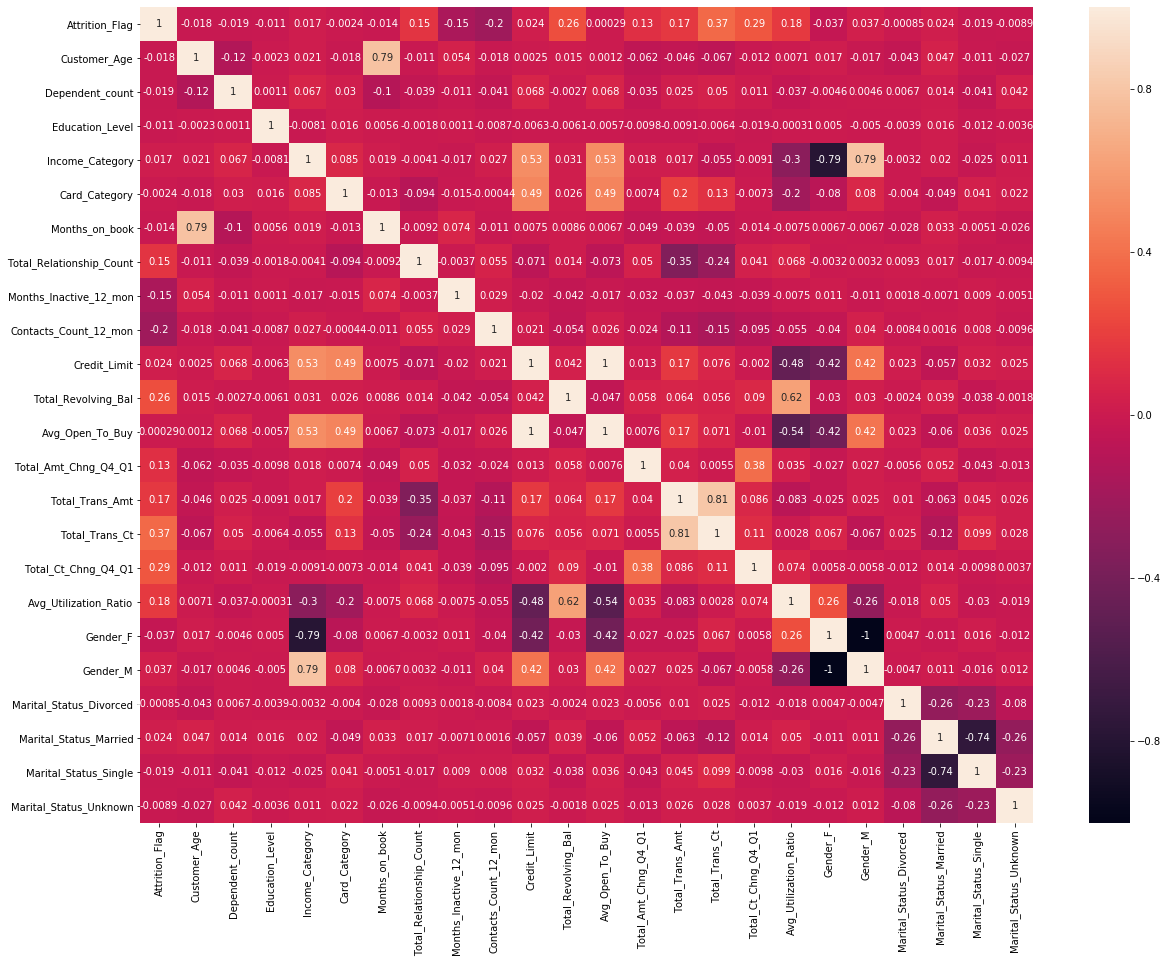

In [42]:
import seaborn as sns

plt.subplots(figsize=(20,15))
ax = sns.heatmap(churn_corr, annot=True,)

Text(0, 0.5, 'Churn')

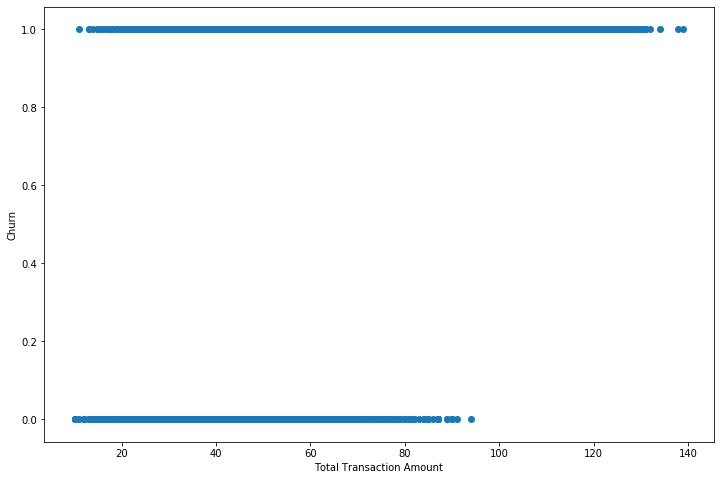

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(churn_df['Total_Trans_Ct'], churn_df['Attrition_Flag'])

plt.xlabel('Total Transaction Amount')
plt.ylabel('Churn')

Text(0, 0.5, 'Total Revolving Bal')

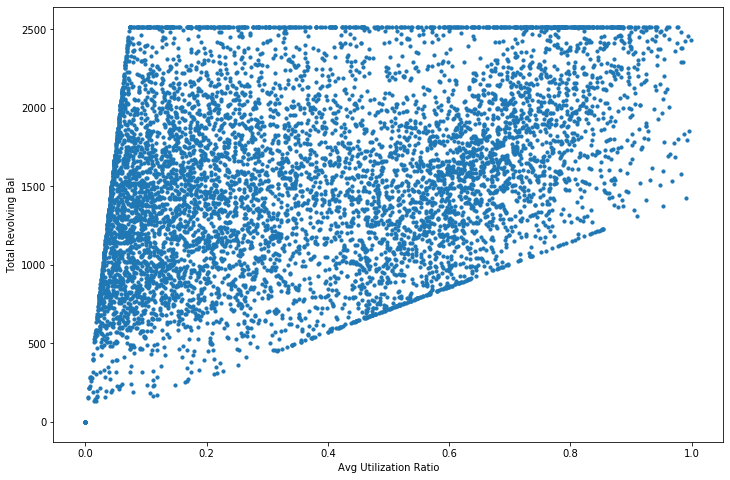

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(churn_df['Avg_Utilization_Ratio'], churn_df['Total_Revolving_Bal'], s=10)

plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Total Revolving Bal')

In [45]:
from sklearn.model_selection import train_test_split

X = churn_df.drop('Attrition_Flag', axis=1)
y = churn_df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
churn_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown'],
      dtype='object')

In [47]:
X.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,2,3,0,39,5,1,3,12691.0,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,49,5,4,0,0,44,6,1,2,8256.0,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,51,3,4,4,0,36,4,1,0,3418.0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,40,4,2,0,0,34,3,4,1,3313.0,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,40,3,0,3,0,21,5,1,0,4716.0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [48]:
X.shape

(10127, 23)

In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int32

In [50]:
y.shape

(10127,)

In [51]:
X_train.shape, y_train.shape

((8101, 23), (8101,))

In [52]:
X_test.shape, y_test.shape

((2026, 23), (2026,))

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [55]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [56]:
pred_results.sample(5)

,y_test,y_pred
4589,1,1
7900,0,1
3178,1,1
3237,1,1
1056,1,1


In [57]:
churn_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

churn_crosstab

y_test,0,1
y_pred,,
0,157,59
1,157,1653


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))

Accuracy:  0.8933859822309971
Precision:  0.9132596685082873
Recall:  0.9655373831775701


In [59]:
s = model.score(X_train, y_train)
s

0.8917417602765091

In [60]:
s = model.score(X_test, y_test)
s

0.8933859822309971

In [61]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier().fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
training_score = model2.score(X_train, y_train)
test_score = model2.score(X_test, y_test)

print("Decision tree ~ training score: ", training_score)
print("Decision tree ~ test score: ", test_score)

Decision tree ~ training score:  1.0
Decision tree ~ test score:  0.9422507403751234


In [62]:
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print("Precision: ", precision_score(y_test,y_pred2))
print("Recall: ", recall_score(y_test,y_pred2))

Accuracy:  0.9422507403751234
Precision:  0.9666471620830895
Recall:  0.9649532710280374


In [63]:
pred_results2 = pd.DataFrame({'y_test': y_test,
                             'y_pred2': y_pred})

pred_results2.sample(5)

,y_test,y_pred2
5749,1,1
5703,1,1
3129,1,1
9317,1,1
5978,1,1


In [64]:
churn_crosstab2 = pd.crosstab(pred_results2.y_pred2, pred_results2.y_test)

churn_crosstab2

y_test,0,1
y_pred2,,
0,157,59
1,157,1653


In [65]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier().fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
training_score = model3.score(X_train, y_train)
test_score = model3.score(X_test, y_test)

print("K nearest ~ training score: ", training_score)
print("K nearest tree ~ test score: ", test_score)

K nearest ~ training score:  0.9216146154795705
K nearest tree ~ test score:  0.8953603158933859


In [66]:
print("Accuracy: ", accuracy_score(y_test,y_pred3))
print("Precision: ", precision_score(y_test,y_pred3))
print("Recall: ", recall_score(y_test,y_pred3))

Accuracy:  0.8953603158933859
Precision:  0.9251700680272109
Recall:  0.9532710280373832


In [67]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
training_score = model4.score(X_train, y_train)
test_score = model4.score(X_test, y_test)

print("Random Forest ~ training score: ", training_score)
print("Random Forest ~ test score: ", test_score)

Random Forest ~ training score:  0.8689050734477225
Random Forest ~ test score:  0.870187561697927


In [68]:
print("Accuracy: ", accuracy_score(y_test,y_pred4))
print("Precision: ", precision_score(y_test,y_pred4))
print("Recall: ", recall_score(y_test,y_pred4))

Accuracy:  0.870187561697927
Precision:  0.867579908675799
Recall:  0.9988317757009346


In [70]:
from sklearn.naive_bayes import GaussianNB

model5 =  GaussianNB().fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
training_score = model5.score(X_train, y_train)
test_score = model5.score(X_test, y_test)

print("Naive Bayes ~ training score: ", training_score)
print("Naive Bayes ~ test score: ", test_score)

Naive Bayes ~ training score:  0.8984076039995063
Naive Bayes ~ test score:  0.8973346495557749


In [71]:
print("Accuracy: ", accuracy_score(y_test,y_pred5))
print("Precision: ", precision_score(y_test,y_pred5))
print("Recall: ", recall_score(y_test,y_pred5))

Accuracy:  0.8973346495557749
Precision:  0.9306987399770905
Recall:  0.9491822429906542
